In [4]:
import pandas as pd

In [5]:
# Reading the CSV File and storing it in the dataframe
data=pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
# Importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



## EDA

In [7]:
# To find out any missing values in the data and if there are they can be handled using multiple approaches like mean, median, 
# mode, or iterative imputing
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
data.shape

(918, 12)

Mean 53.510893246187365
Median 54.0
Mode 54


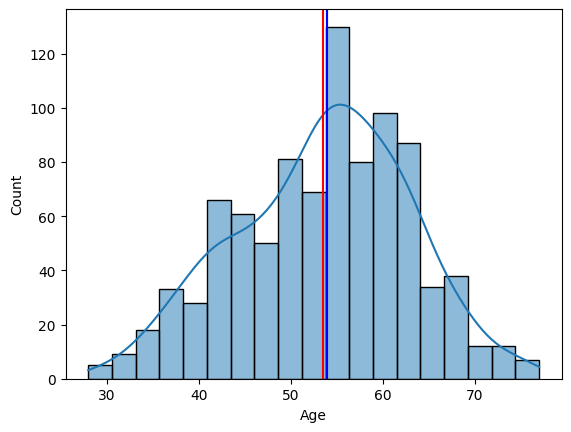

In [9]:
sns.histplot(data['Age'], kde=True)
plt.axvline(data['Age'].mean(), color='r')
plt.axvline(data['Age'].median(), color='g')
plt.axvline(data['Age'].mode()[0], color='b')

print('Mean', data['Age'].mean())
print('Median', data['Age'].median())
print('Mode', data['Age'].mode()[0])

In [10]:
print(data.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [11]:
data['Age'].groupby(data['Sex']).value_counts()

Sex  Age
F    54     15
     51     11
     62     10
     43      9
     48      9
            ..
M    77      2
     28      1
     31      1
     33      1
     76      1
Name: count, Length: 91, dtype: int64

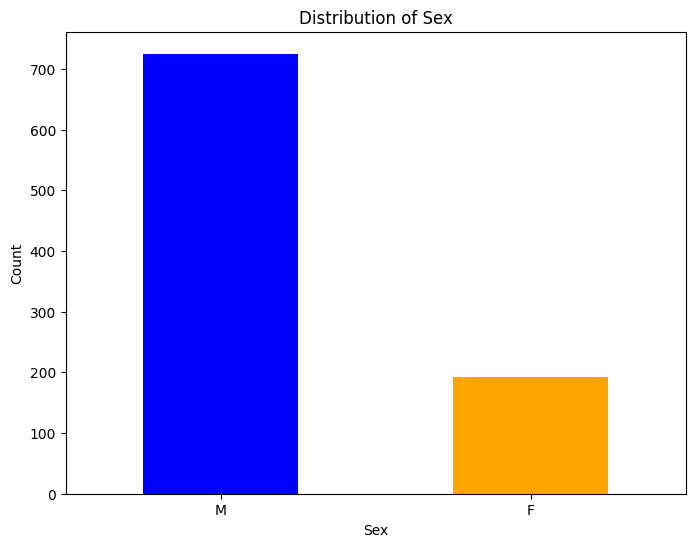

In [12]:
sex_counts = data['Sex'].value_counts()

plt.figure(figsize=(8, 6))
sex_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### we can induce one thing from it that the dataset has more male count than females this means heart diseases are more common in males

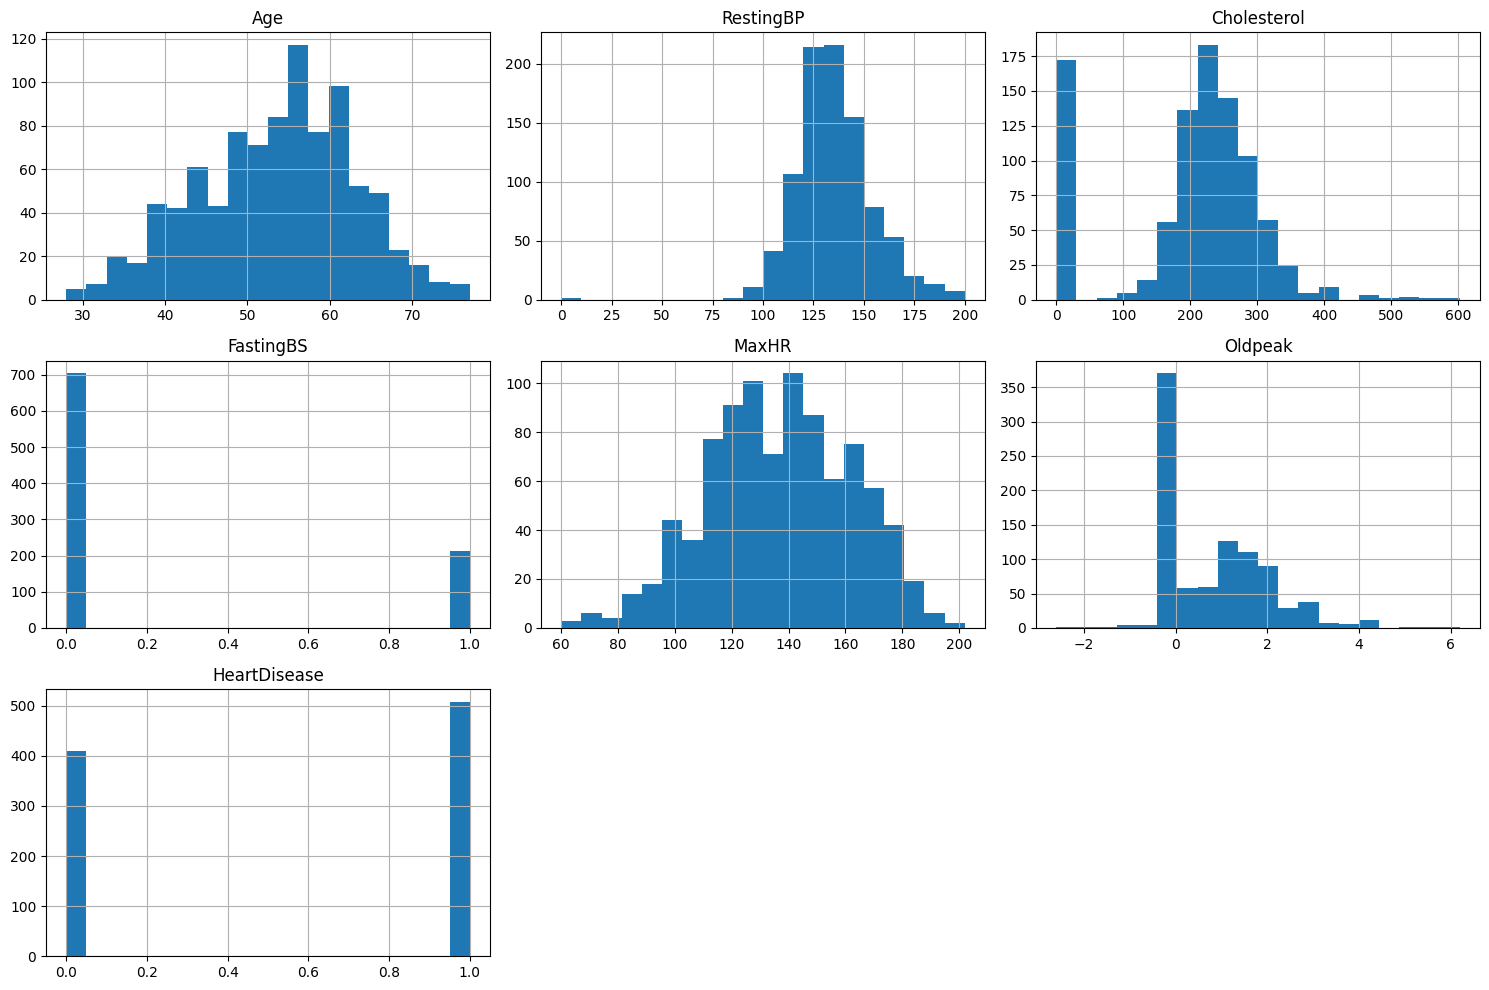

In [13]:
# Now lets plot all the columns (features) to actually analyse them

import matplotlib.pyplot as plt

data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


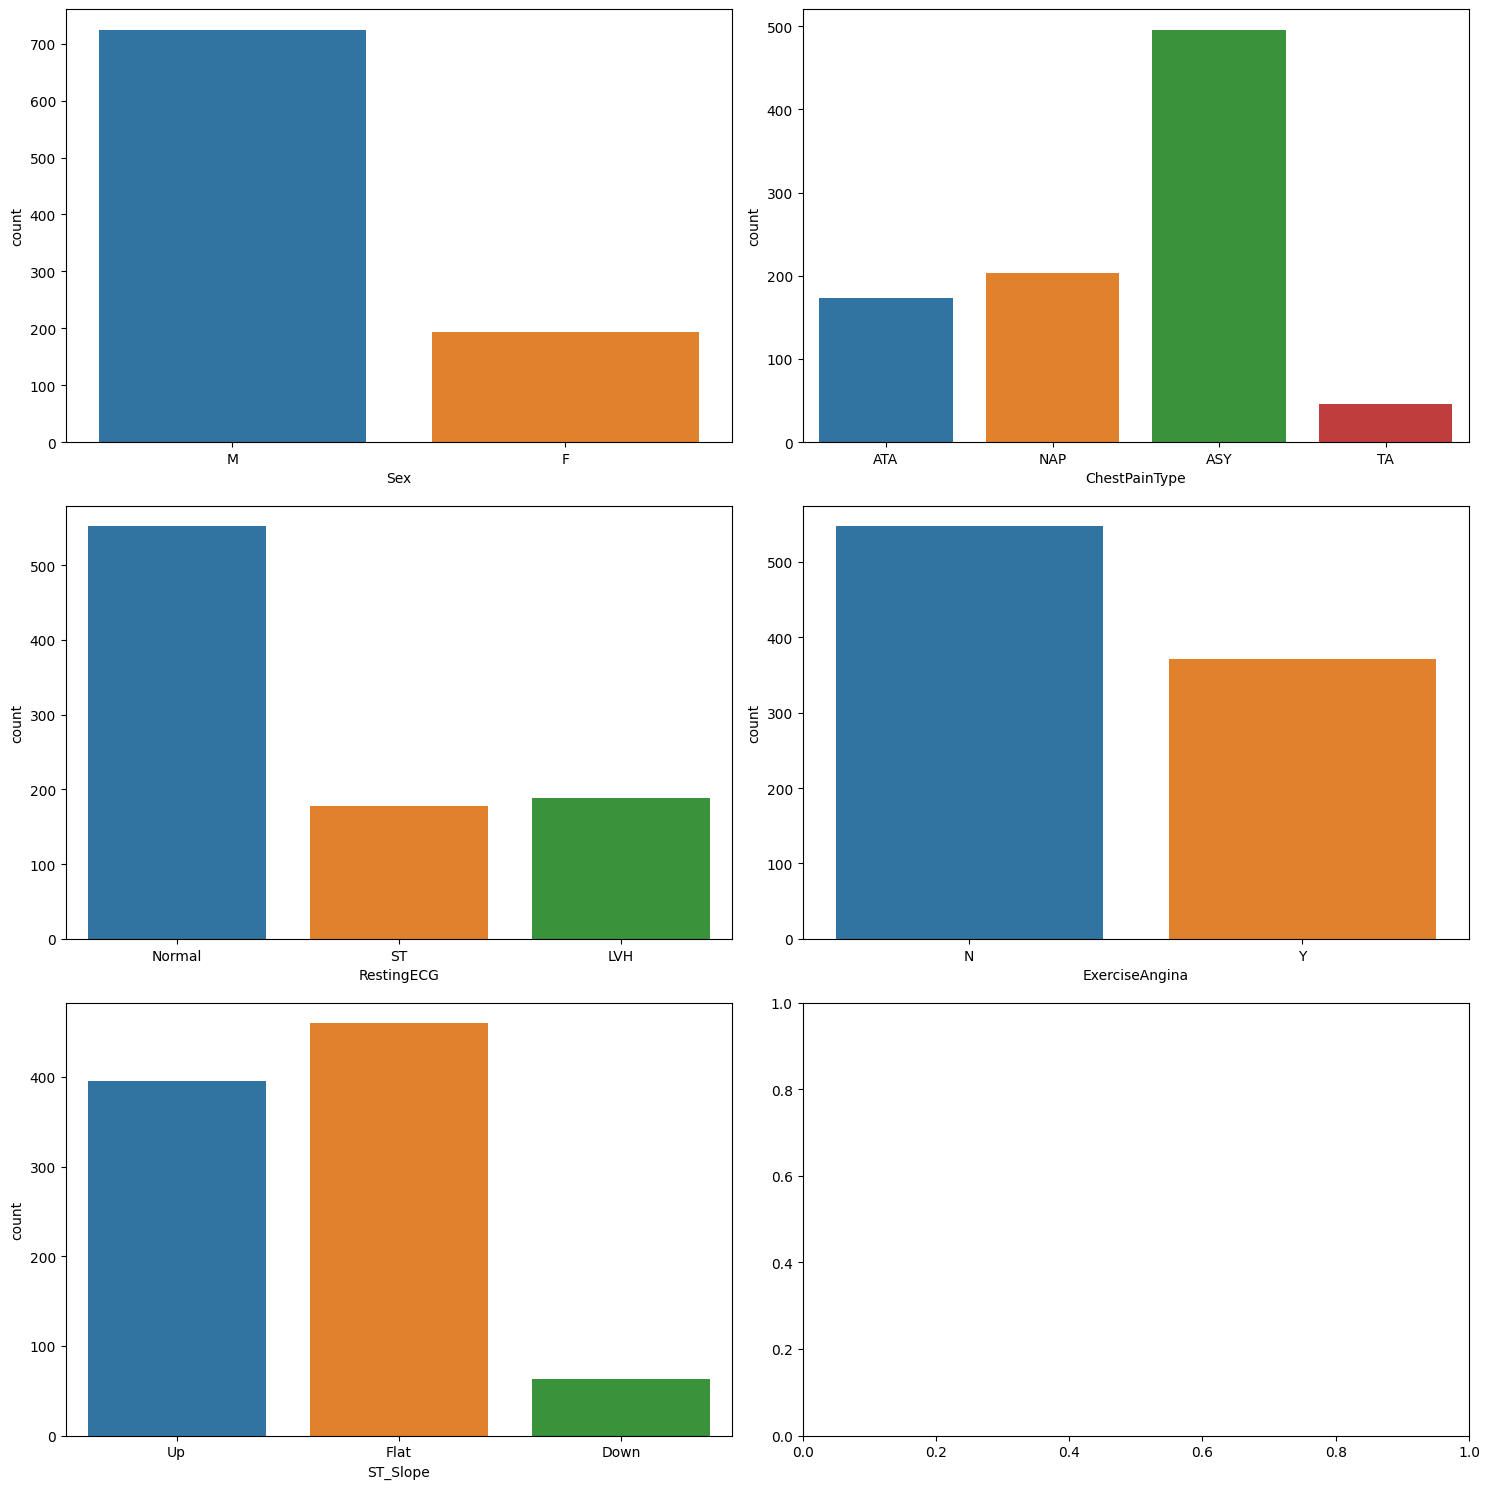

In [14]:

categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, feature in enumerate(categorical_features):
    sns.countplot(data=data, hue=feature, x=feature, ax=axes[i // 2, i % 2])

plt.tight_layout()
plt.show()


### BiVariate Analysis

<Axes: xlabel='ChestPainType', ylabel='count'>

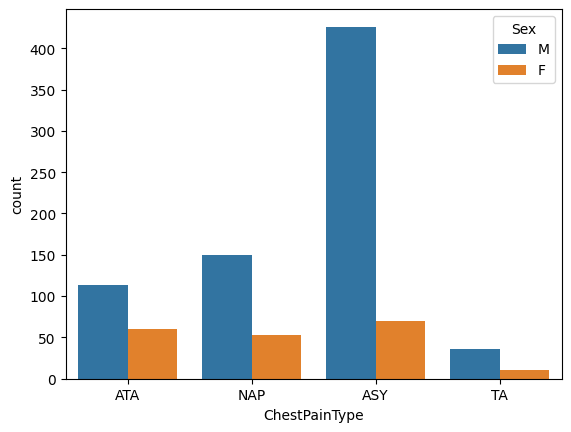

In [15]:
#chestpaintype according to sex
sns.countplot(data=data, x='ChestPainType', hue='Sex')


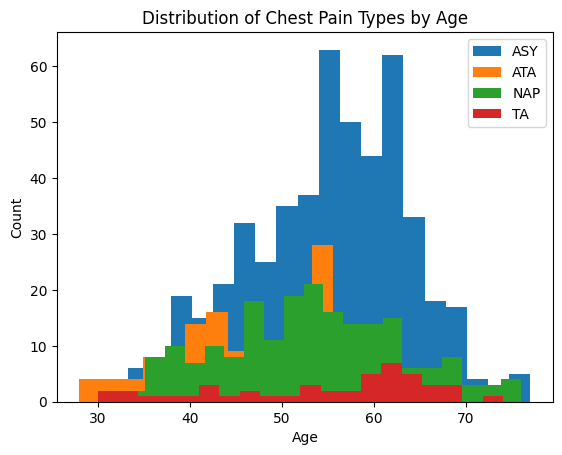

In [16]:

# Create a histogram with Pandas
data.groupby('ChestPainType').Age.plot(kind='hist', alpha=1.0, legend=True, bins=20)
plt.title('Distribution of Chest Pain Types by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


           mean  median         std  count
Age                                       
28   132.000000   132.0         NaN      1
29   236.666667   243.0   30.005555      3
30   237.000000   237.0         NaN      1
31   244.500000   244.5   36.062446      2
32   241.200000   225.0  189.274140      5
33   272.000000   272.0   36.769553      2
34   163.285714   182.0   76.421450      7
35   197.454545   192.0   83.802582     11
36   190.333333   187.5  115.208796      6
37   233.727273   223.0   41.219148     11
38   146.500000   182.5  126.738050     16
39   239.200000   220.0   54.503211     15
40   229.384615   235.0  129.476857     13
41   216.500000   236.0   82.004242     24
42   212.222222   227.0   91.844213     18
43   202.333333   219.0  101.799747     24
44   249.578947   226.0   82.221460     19
45   229.333333   235.0   69.945357     18
46   217.166667   233.5   76.881991     24
47   193.421053   243.0  105.588465     19
48   228.193548   245.0   75.256636     31
49   213.47

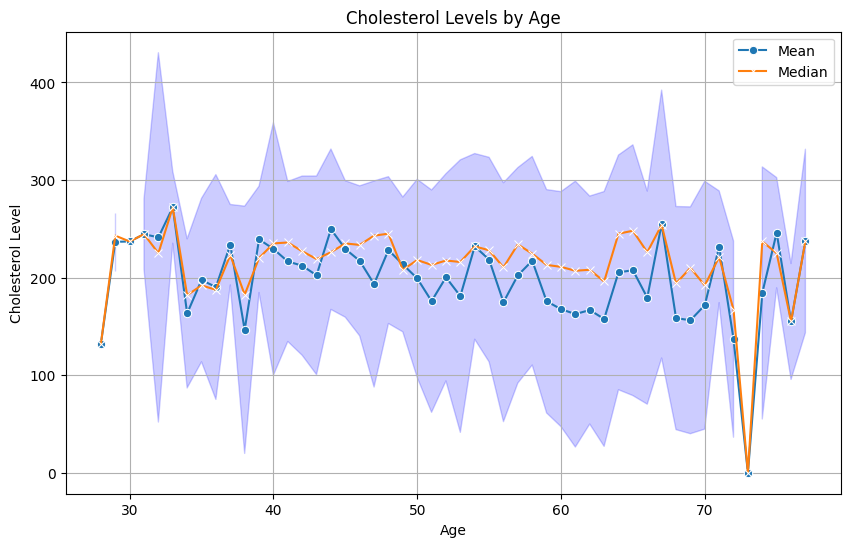

In [17]:
age_grouped = data.groupby('Age')['Cholesterol'].agg(['mean', 'median', 'std', 'count'])

print(age_grouped)

# Visualize the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_grouped, x=age_grouped.index, y='mean', marker='o', label='Mean')
sns.lineplot(data=age_grouped, x=age_grouped.index, y='median', marker='x', label='Median')
plt.fill_between(age_grouped.index, age_grouped['mean'] - age_grouped['std'], age_grouped['mean'] + age_grouped['std'], color='b', alpha=0.2)
plt.title('Cholesterol Levels by Age')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.legend()
plt.grid(True)
plt.show()

           mean  median
Age                    
28   130.000000   130.0
29   130.000000   130.0
30   170.000000   170.0
31   110.000000   110.0
32   110.600000   110.0
33   110.000000   110.0
34   124.142857   118.0
35   126.272727   122.0
36   123.666667   120.0
37   127.090909   130.0
38   120.000000   117.5
39   127.333333   120.0
40   128.307692   130.0
41   120.458333   120.0
42   129.166667   125.0
43   126.666667   121.0
44   125.947368   120.0
45   129.222222   130.0
46   126.375000   120.0
47   132.526316   135.0
48   128.000000   124.0
49   129.047619   130.0
50   135.000000   140.0
51   127.742857   130.0
52   133.638889   130.0
53   131.090909   130.0
54   133.568627   130.0
55   131.317073   135.0
56   133.894737   130.0
57   136.368421   139.5
58   132.000000   130.0
59   141.085714   138.0
60   135.468750   133.5
61   137.483871   138.0
62   134.885714   135.0
63   136.833333   136.0
64   137.590909   137.0
65   141.761905   140.0
66   139.461538   146.0
67   133.533333 

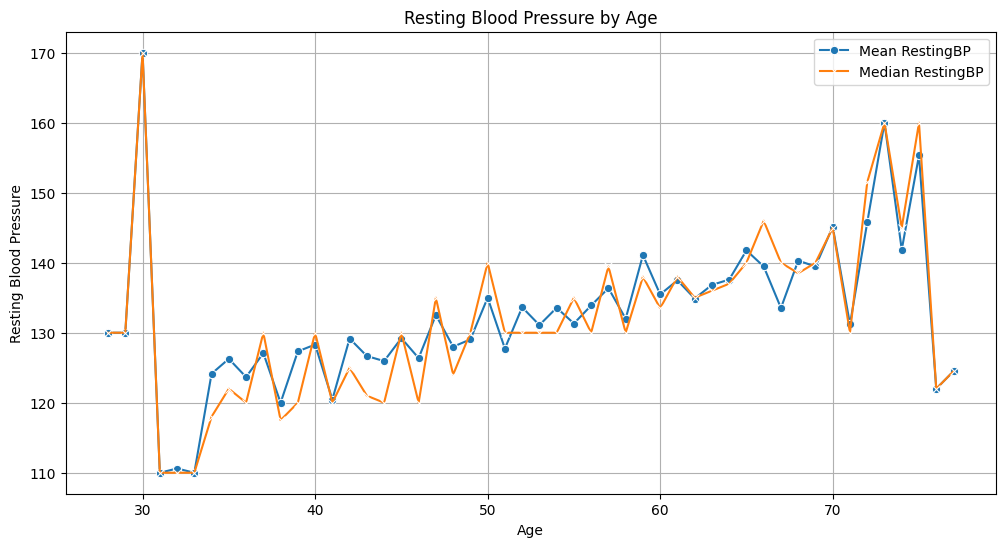

In [18]:
age_grouped_bps=data.groupby('Age')['RestingBP'].agg(['mean', 'median'])
print(age_grouped_bps)

plt.figure(figsize=(12, 6))

# Line plot for mean RestingBP
sns.lineplot(data=age_grouped_bps, x=age_grouped_bps.index, y='mean', marker='o', label='Mean RestingBP')

# Line plot for median RestingBP
sns.lineplot(data=age_grouped_bps, x=age_grouped_bps.index, y='median', marker='x', label='Median RestingBP')

# Adding labels, title, and legend
plt.title('Resting Blood Pressure by Age')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



### Now we have to set a threshold to drop columns that does not have acceptable corelation score with the target variable that is heart disease

### MultiCollinearity thresholds to drop irrelevant features

High Correlation Pairs: [('ST_Slope_Flat', 'ST_Slope_Up'), ('ST_Slope_Up', 'ST_Slope_Flat')]
Features to Drop Due to High Correlation: {'ST_Slope_Up'}
Features with Low Correlation with the Target: ['ChestPainType_TA', 'RestingECG_Normal']
Final Features: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat']
Data shape after feature reduction: (918, 13)


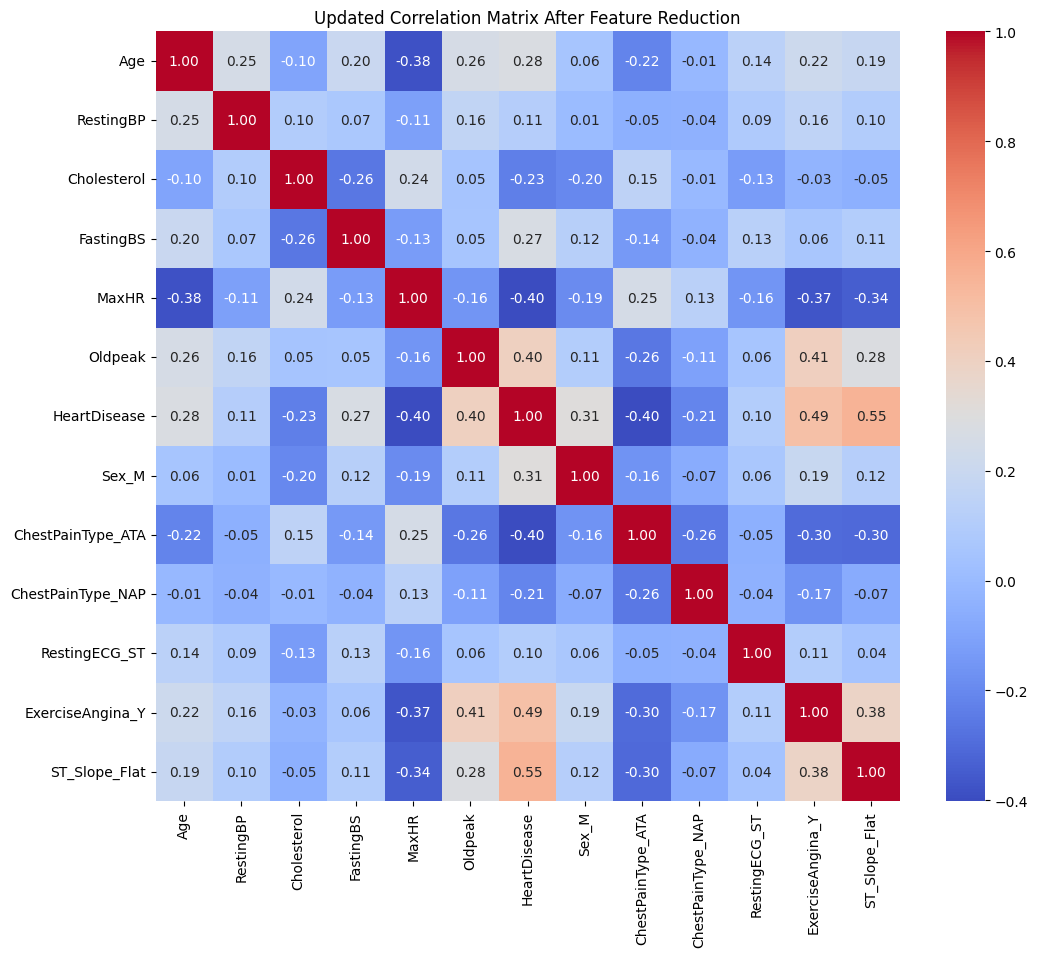

In [19]:

# Encode categorical features
data_encoded = pd.get_dummies(data, drop_first=True)

# Calculate correlation matrix
corr_matrix = data_encoded.corr()

# Identify pairs of features with high correlation
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns 
                   if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.8]

print("High Correlation Pairs:", high_corr_pairs)

# Create a set to hold features to drop due to high correlation
features_to_drop_due_to_high_corr = set()
for col1, col2 in high_corr_pairs:
    if col1 not in features_to_drop_due_to_high_corr and col2 not in features_to_drop_due_to_high_corr:
        features_to_drop_due_to_high_corr.add(col2)  # Drop the second feature in each pair

print("Features to Drop Due to High Correlation:", features_to_drop_due_to_high_corr)

# Identify features with low correlation with the target variable
corr_with_target = corr_matrix["HeartDisease"].sort_values(ascending=False)
low_corr_features = corr_with_target[abs(corr_with_target) < 0.1].index.tolist()

print("Features with Low Correlation with the Target:", low_corr_features)

# Combine features to drop
features_to_drop = features_to_drop_due_to_high_corr.union(low_corr_features)

# Update the final list of features
final_features = [col for col in data_encoded.columns if col not in features_to_drop]

# Create reduced dataset
data_reduced = data_encoded[final_features]

print("Final Features:", final_features)
print("Data shape after feature reduction:", data_reduced.shape)

# Re-calculate and visualize the updated correlation matrix
corr_matrix_reduced = data_reduced.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_reduced, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Updated Correlation Matrix After Feature Reduction')
plt.show()


### EDA Results

We can induce that:
1. Min age for heart disease starts from 28
2. Heart Disease problem occurs more in ages between 53-55
3. Heart Diseases are more commmon in Males
4. The Resting blood pressure values tend to increase by age as the mean and median values are more stable during young age but shows variability by increase in age
5. Most Males and Females have Asymptotic Chest Pain
6. We have calculated collinearilty using corelation matrix and values lesser than 0.1 are considered as having no direct effect on the target variable (Heart Disease) and values greater than 0.8 are also dropped to avoid multicollinearity between features

### Machine Learning Models

We will use multiple classifiers for multi-class classfiiation 

1. Logistic regression 
2. KNN
3. NB
4. SVM
5. Decision Tree 
6. Random Forest
7. XGBoost
8. GardientBoost
9. AdaBoost
10. LightGBM

#### Hyperparameter tuning GridSearchCV is used to find the best model configuration

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Define features and target
X = data_reduced.drop('HeartDisease', axis=1)
y = data_reduced['HeartDisease']

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
# Preprocessing for numerical data
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features)
    ]
)

# Define the parameter grid for each model
param_grids = {
    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1]
    },
    'Support Vector Machine': {
        'classifier__C': [0.1, 1, 10],
        'classifier__gamma': ['scale', 'auto']
    },
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear', 'lbfgs']
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [3, 6, 9]
    },
    'LGBM': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__num_leaves': [31, 62]
    },
    'AdaBoost': {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.01, 0.1]
    },
    'Naive Bayes': {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
    }
}

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('LGBM', LGBMClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate over the models and perform hyperparameter tuning
for name, model in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    param_grid = param_grids.get(name, {})
    
    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its accuracy
    best_model_pipeline = grid_search.best_estimator_
    best_cross_val_accuracy = grid_search.best_score_
    
    # Make predictions on the test data
    y_pred = best_model_pipeline.predict(X_test)
    
    # Calculate test accuracy score
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Cross-validation Accuracy: {best_cross_val_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print()
    
    # Check if the current model has the best accuracy
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = best_model_pipeline

# Retrieve the best model
print(f"Best Overall Model: {best_model.named_steps['classifier']}")
print(f"Best Overall Model Test Accuracy: {best_accuracy:.4f}")


Model: Random Forest
Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Cross-validation Accuracy: 0.7820
Test Accuracy: 0.7446

Model: Gradient Boosting
Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 100}
Cross-validation Accuracy: 0.7997
Test Accuracy: 0.7663

Model: Support Vector Machine
Best Parameters: {'classifier__C': 1, 'classifier__gamma': 'scale'}
Cross-validation Accuracy: 0.7970
Test Accuracy: 0.7283

Model: Logistic Regression
Best Parameters: {'classifier__C': 1, 'classifier__solver': 'liblinear'}
Cross-validation Accuracy: 0.7779
Test Accuracy: 0.7391

Model: KNN
Best Parameters: {'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}
Cross-validation Accuracy: 0.7765
Test Accuracy: 0.7500

Model: Decision Tree
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Cross-validation Accuracy: 0.7248
Test Accuracy: 0.7391

Model: XGBoost
Best Parameters: {'classifier__le

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}
Cross-validation Accuracy: 0.7834
Test Accuracy: 0.7446

Model: Naive Bayes
Best Parameters: {'classifier__var_smoothing': 1e-09}
Cross-validation Accuracy: 0.7752
Test Accuracy: 0.7663

Best Overall Model: GradientBoostingClassifier(learning_rate=0.01, random_state=42)
Best Overall Model Test Accuracy: 0.7663


### Model Deployment on Streamlit, we could have used Flask and then tradition html, css but strealit can be used directly to create interactive web application.

In [22]:
# Save the best model
joblib.dump(best_model, 'gradient_boosting_classifier.pkl')

['gradient_boosting_classifier.pkl']